In [1]:
#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
%matplotlib inline

#propios utilitarios
from utils import *

data_perfil = pd.read_csv('data/02dataBasePerfilRec.csv')
data_perfil.head()

,codCliente,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,24041,Rango2,Rango2,1,0,360.0,Rango1,Rango1,Rango1,1,NaN,NaN,NaN,NaN
1,9040,Rango4,Rango6,1,1,260.0,Rango1,Rango1,Rango1,1,Rango1,Rango1,Rango1,Rango1
2,18233,Rango2,Rango1,1,1,273.0,Rango1,Rango2,Rango1,1,Rango2,Rango1,Rango1,Rango1
3,7226,Rango5,Rango3,0,1,241.0,Rango1,Rango2,Rango1,1,Rango1,Rango2,Rango1,Rango2
4,21617,Rango3,Rango2,1,1,268.0,Rango1,Rango1,Rango1,0,NaN,NaN,NaN,NaN


# TRATAMIENTO DE NULOS

### 1. Conteo

In [2]:
null_verificator(data_perfil)

,Nulos,Cantidad,Tipo Col
codCliente,False,0,int64
rangoEdad,True,57,object
rangoIngreso,True,1263,object
flagGenero,False,0,int64
flagLimaProvCliente,False,0,int64
ubigeoCliente,True,4,float64
rangoCtdProdAct,False,0,object
rangoCtdProdPas,False,0,object
rangoCtdProdSeg,False,0,object
flagBxi,False,0,int64


### 2. Frecuencias

In [3]:
data_perfil['rangoIngreso'].value_counts(dropna=False)

Rango1    11003
Rango3     5241
Rango2     4533
Rango6     3930
Rango4     2516
Rango5     1514
NaN        1263
Name: rangoIngreso, dtype: int64

In [4]:
data_perfil['saldoTcEntidad1'].value_counts(dropna=False)

Rango1    15429
NaN        6426
Rango3     2076
Rango2     1731
Rango4     1713
Rango6     1571
Rango5     1054
Name: saldoTcEntidad1, dtype: int64

In [5]:
data_perfil['saldoTcEntidad2'].value_counts(dropna=False)

Rango1    18084
NaN        6426
Rango2     2313
Rango3     1494
Rango5      949
Rango4      734
Name: saldoTcEntidad2, dtype: int64

In [6]:
data_perfil['saldoTcEntidad3'].value_counts(dropna=False)

Rango1    20718
NaN        6426
Rango6      729
Rango2      571
Rango3      561
Rango5      518
Rango4      477
Name: saldoTcEntidad3, dtype: int64

In [7]:
data_perfil['saldoTcEntidad4'].value_counts(dropna=False)

Rango1    18910
NaN        6426
Rango2     1096
Rango3      998
Rango6      975
Rango5      818
Rango4      777
Name: saldoTcEntidad4, dtype: int64

In [8]:
data_perfil['ubigeoCliente'].value_counts(dropna=False).sort_index()[:10]

2.0      5
3.0      1
4.0      1
5.0      3
6.0     39
7.0     23
8.0      1
9.0      2
10.0     1
Name: ubigeoCliente, dtype: int64

### 3. Imputacion por un nuevo tipo (cualitativo)

In [9]:
data_perfil['ubigeoCliente'].fillna(999.0, inplace=True)

In [10]:
for col in [_ for _ in data_perfil.columns if data_perfil[_].isnull().any()]:
    print(col)
    data_perfil[col].fillna('Rango0', inplace=True)

rangoEdad
rangoIngreso
saldoTcEntidad1
saldoTcEntidad2
saldoTcEntidad3
saldoTcEntidad4


In [12]:
null_verificator(data_perfil)

'DATA LIMPIA DE NULOS'

# CONVERSION A VARIABLES NUMERICAS

In [11]:
data_perfil.select_dtypes(include=['object']).head()

,rangoEdad,rangoIngreso,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,Rango2,Rango2,Rango1,Rango1,Rango1,Rango0,Rango0,Rango0,Rango0
1,Rango4,Rango6,Rango1,Rango1,Rango1,Rango1,Rango1,Rango1,Rango1
2,Rango2,Rango1,Rango1,Rango2,Rango1,Rango2,Rango1,Rango1,Rango1
3,Rango5,Rango3,Rango1,Rango2,Rango1,Rango1,Rango2,Rango1,Rango2
4,Rango3,Rango2,Rango1,Rango1,Rango1,Rango0,Rango0,Rango0,Rango0


In [13]:
columnas_rango = list(data_perfil.select_dtypes(include=['object']).columns)
columnas_rango

['rangoEdad',
 'rangoIngreso',
 'rangoCtdProdAct',
 'rangoCtdProdPas',
 'rangoCtdProdSeg',
 'saldoTcEntidad1',
 'saldoTcEntidad2',
 'saldoTcEntidad3',
 'saldoTcEntidad4']

In [14]:
for col in columnas_rango:
    data_perfil[col] = data_perfil[col].apply(lambda x: int(x[-1]))

In [15]:
data_perfil.head()

,codCliente,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,24041,2,2,1,0,360.0,1,1,1,1,0,0,0,0
1,9040,4,6,1,1,260.0,1,1,1,1,1,1,1,1
2,18233,2,1,1,1,273.0,1,2,1,1,2,1,1,1
3,7226,5,3,0,1,241.0,1,2,1,1,1,2,1,2
4,21617,3,2,1,1,268.0,1,1,1,0,0,0,0,0


In [16]:
data_perfil = reduce_size_data(data_perfil, category=False, default='integer')

Tamaño de uso actual :  3.2044219970703125 MB
-> Int 64 Detected
     codCliente
     rangoEdad
     rangoIngreso
     flagGenero
     flagLimaProvCliente
     rangoCtdProdAct
     rangoCtdProdPas
     rangoCtdProdSeg
     flagBxi
     saldoTcEntidad1
     saldoTcEntidad2
     saldoTcEntidad3
     saldoTcEntidad4
-> Float 64 Detected
     ubigeoCliente
Tamaño de uso final :  0.4578399658203125 MB


In [17]:
data_perfil.dtypes

codCliente             int16
rangoEdad               int8
rangoIngreso            int8
flagGenero              int8
flagLimaProvCliente     int8
ubigeoCliente          int16
rangoCtdProdAct         int8
rangoCtdProdPas         int8
rangoCtdProdSeg         int8
flagBxi                 int8
saldoTcEntidad1         int8
saldoTcEntidad2         int8
saldoTcEntidad3         int8
saldoTcEntidad4         int8
dtype: object

In [18]:
data_perfil.head(10)

,codCliente,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,24041,2,2,1,0,360,1,1,1,1,0,0,0,0
1,9040,4,6,1,1,260,1,1,1,1,1,1,1,1
2,18233,2,1,1,1,273,1,2,1,1,2,1,1,1
3,7226,5,3,0,1,241,1,2,1,1,1,2,1,2
4,21617,3,2,1,1,268,1,1,1,0,0,0,0,0
5,9649,5,6,1,1,273,2,2,2,1,2,1,1,1
6,24762,1,1,1,1,241,1,1,1,1,0,0,0,0
7,2486,5,1,0,1,241,1,1,1,1,1,1,1,1
8,26272,2,1,0,1,268,1,1,1,1,1,1,1,1
9,13242,5,4,0,1,241,1,2,2,1,1,1,1,1


# Analisis de Correlacion

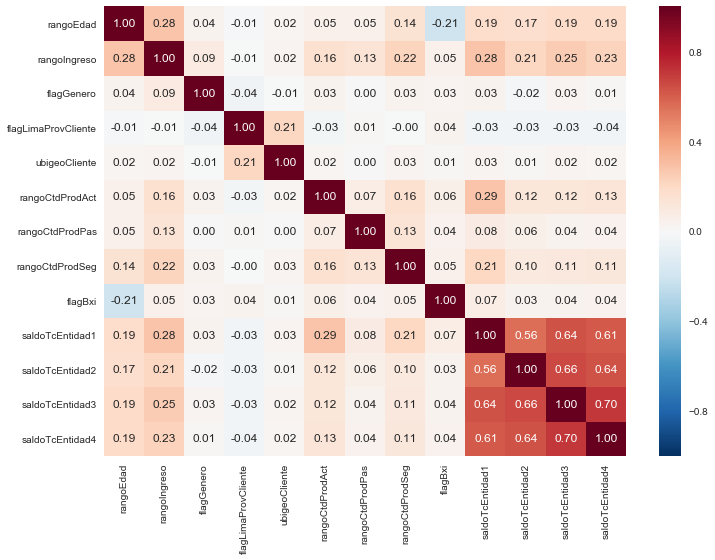

In [19]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(data_perfil.iloc[:,1:].corr('kendall'), annot=True, fmt=".2f", ax=ax)

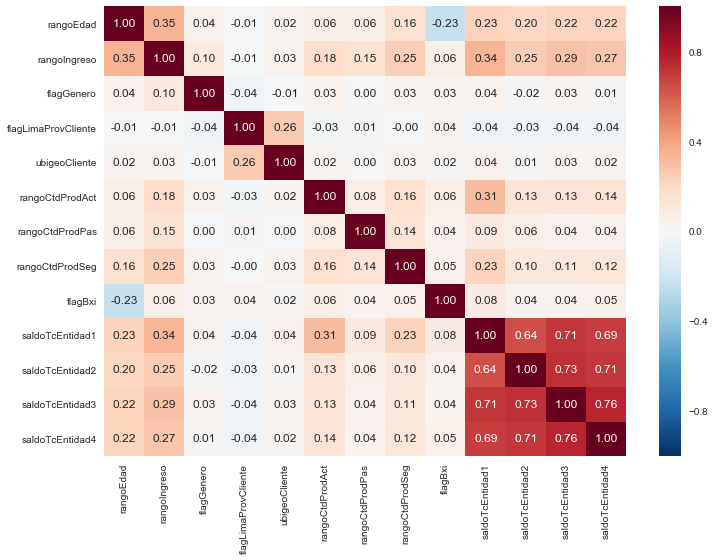

In [20]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(data_perfil.iloc[:,1:].corr('spearman'), annot=True, fmt=".2f", ax=ax)

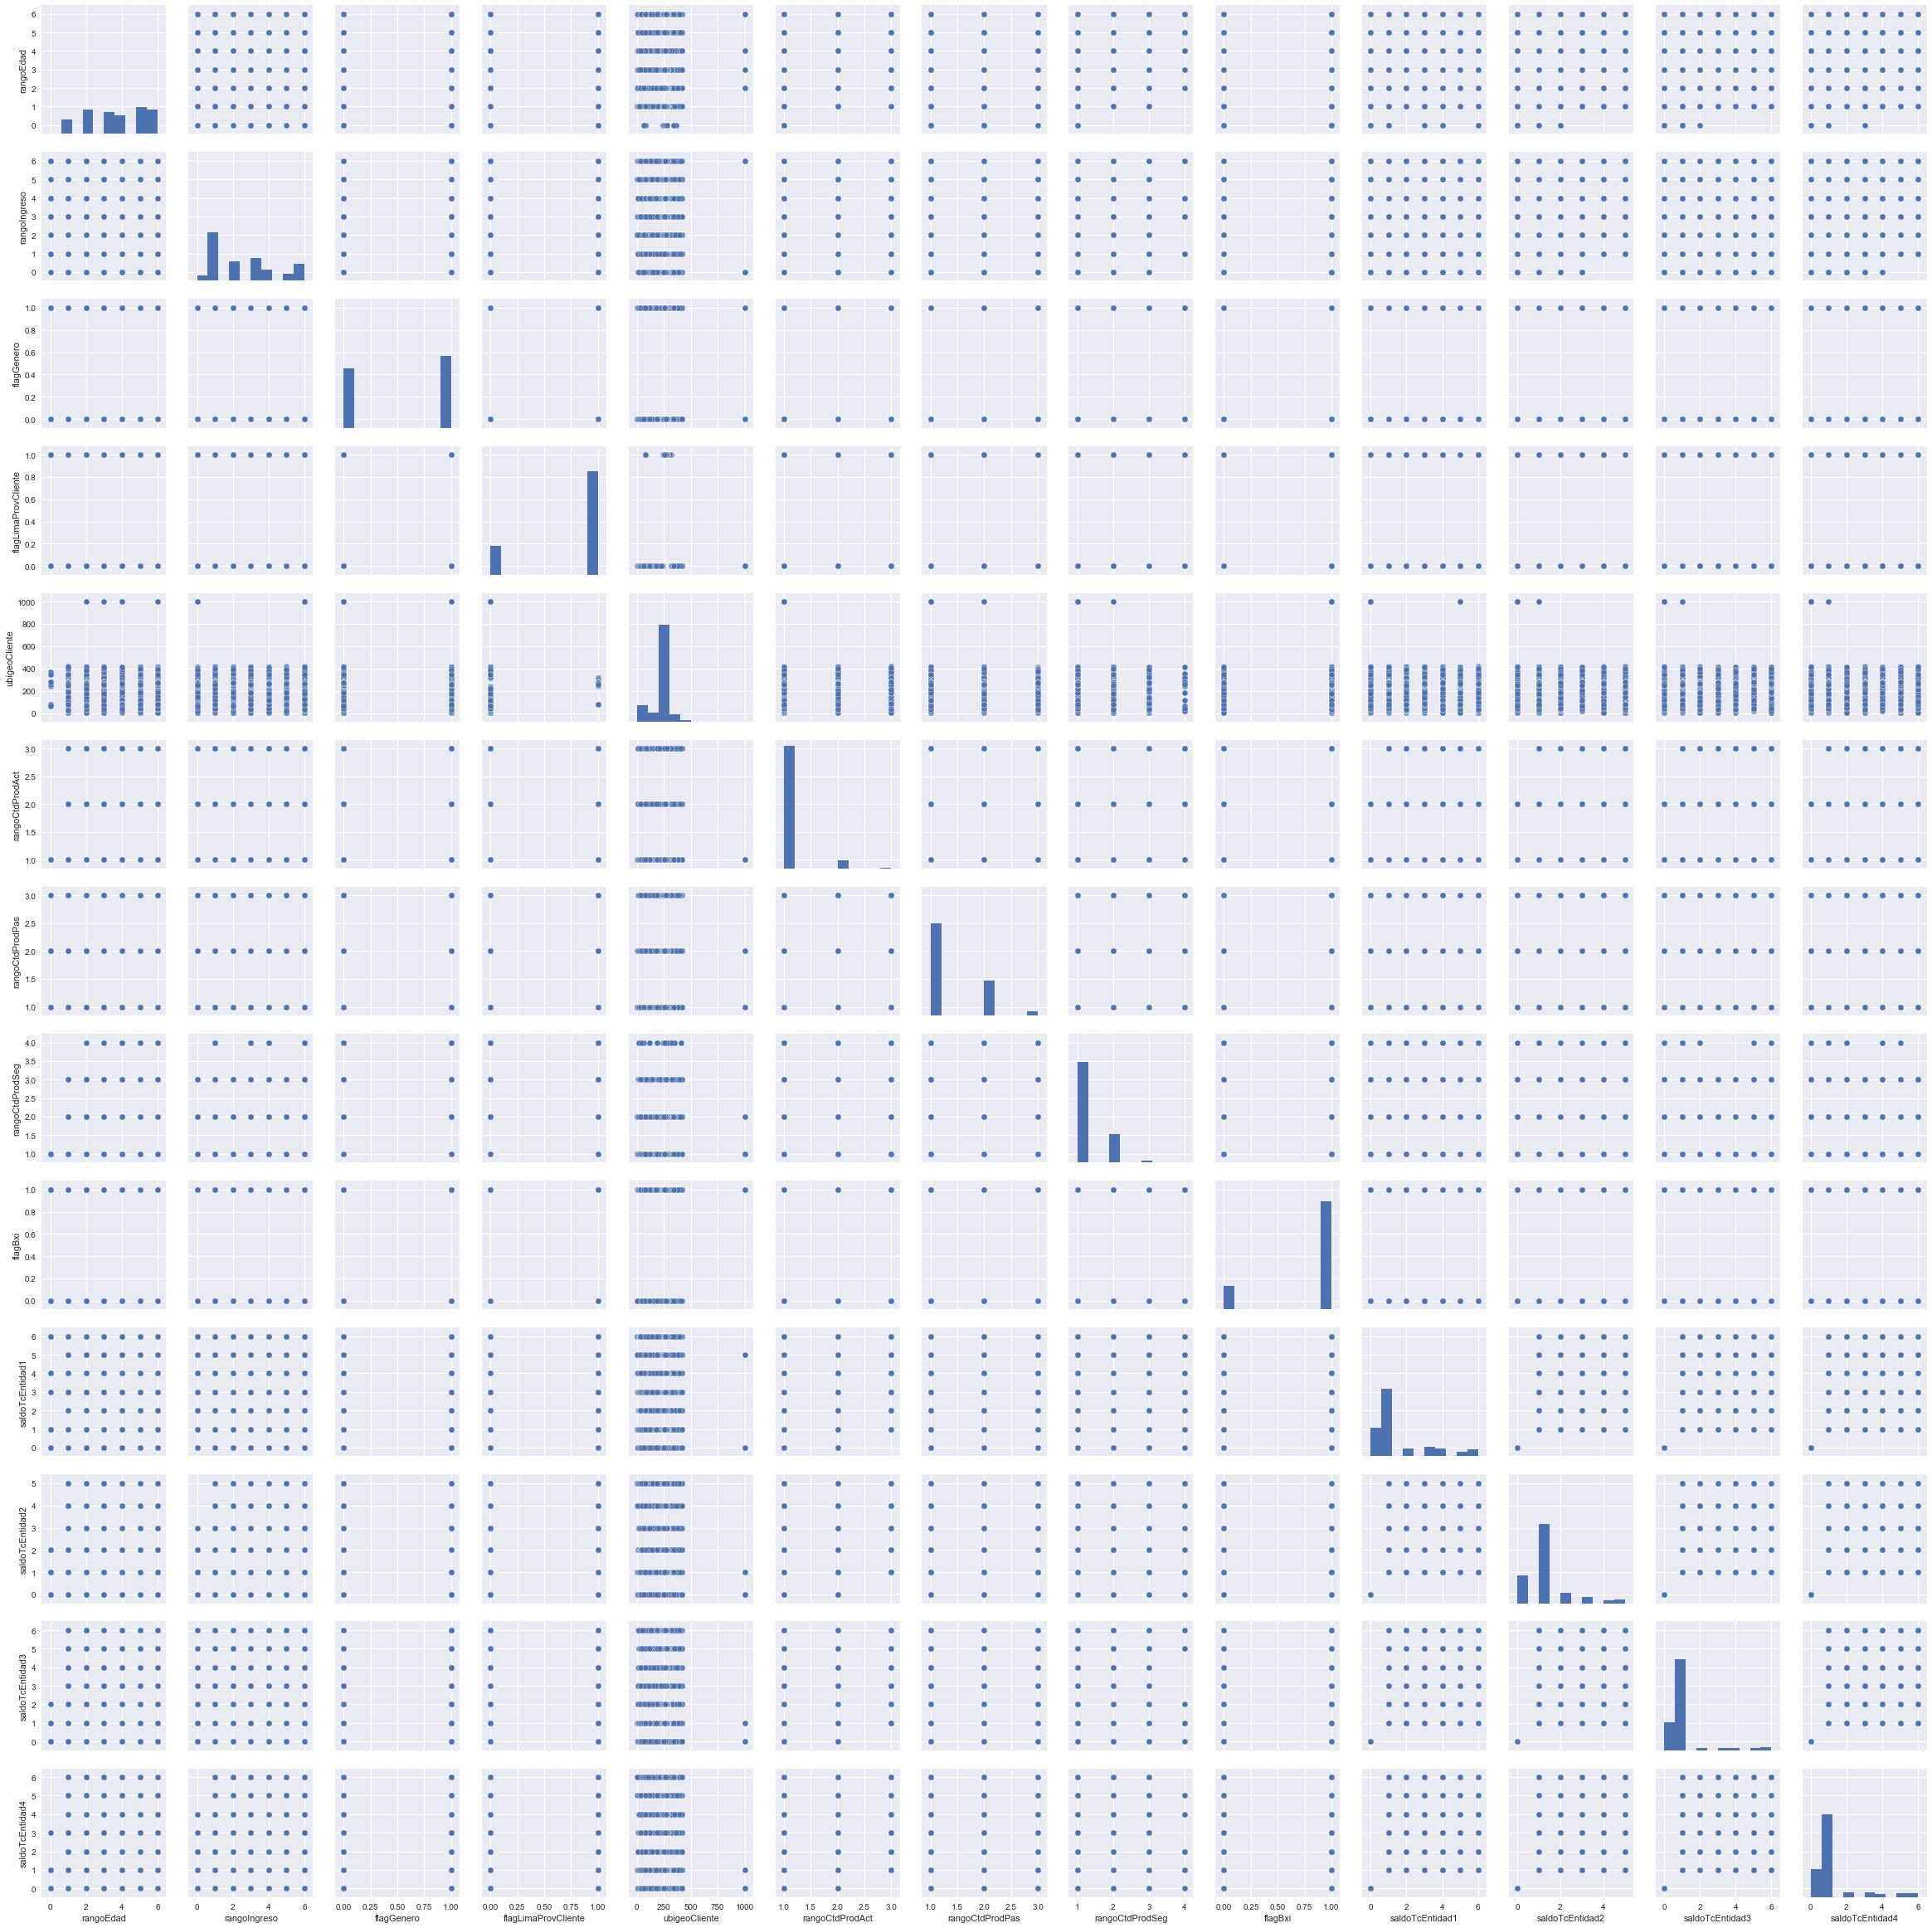

In [21]:
sns.pairplot(data_perfil.iloc[:,1:], kind="scatter")

## ANALIZANDO CLUSTER POR PERFIL

In [22]:
data_cluster = data_perfil.drop(['codCliente'], axis=1)
data_cluster.head()

,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4
0,2,2,1,0,360,1,1,1,1,0,0,0,0
1,4,6,1,1,260,1,1,1,1,1,1,1,1
2,2,1,1,1,273,1,2,1,1,2,1,1,1
3,5,3,0,1,241,1,2,1,1,1,2,1,2
4,3,2,1,1,268,1,1,1,0,0,0,0,0


In [23]:
data_perfil.shape, data_cluster.shape

((30000, 14), (30000, 13))

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_cluster)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
scaler_data = scaler.transform(data_cluster)

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
def simple_get_siluet_score(X):
    for n_clusters in range(2, 20):
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels, sample_size=300)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

In [28]:
simple_get_siluet_score(scaler_data)

For n_clusters = 2 The average silhouette_score is : 0.162010274379
For n_clusters = 3 The average silhouette_score is : 0.161597406
For n_clusters = 4 The average silhouette_score is : 0.144160606487
For n_clusters = 5 The average silhouette_score is : 0.160947988421
For n_clusters = 6 The average silhouette_score is : 0.154321424569
For n_clusters = 7 The average silhouette_score is : 0.134888979684
For n_clusters = 8 The average silhouette_score is : 0.107402949456
For n_clusters = 9 The average silhouette_score is : 0.128623678929
For n_clusters = 10 The average silhouette_score is : 0.121597499541
For n_clusters = 11 The average silhouette_score is : 0.13890374541
For n_clusters = 12 The average silhouette_score is : 0.130432496497
For n_clusters = 13 The average silhouette_score is : 0.123044100823
For n_clusters = 14 The average silhouette_score is : 0.130321851599
For n_clusters = 15 The average silhouette_score is : 0.132987256554
For n_clusters = 16 The average silhouette_sco

In [29]:
def get_inertia(X):
    cluster_range = range( 2, 20 )
    list_intertia = []
    for num_clusters in cluster_range:
        clusters_km = KMeans(num_clusters)
        clusters_km.fit(X)
        list_intertia.append(clusters_km.inertia_)
        
    clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "list_intertia": list_intertia } )
    plt.figure(figsize=(15,5))
    plt.plot( clusters_df.num_clusters, clusters_df.list_intertia, marker = "o" )

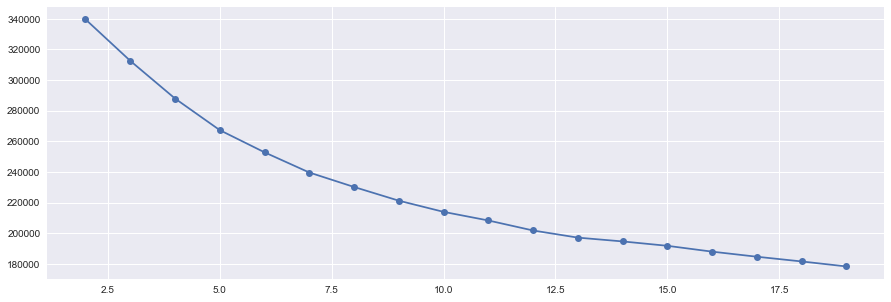

In [30]:
get_inertia(scaler_data)

In [31]:
#Pasando Dataframe Pandas to DataFrame Spark

#Detectando instalacion
import findspark
findspark.init('/opt/spark')

#Levantando sesion
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('victor_bbva').getOrCreate()

In [32]:
spark_df = spark.createDataFrame(data_perfil)

In [34]:
spark_df.columns[1:]

['rangoEdad',
 'rangoIngreso',
 'flagGenero',
 'flagLimaProvCliente',
 'ubigeoCliente',
 'rangoCtdProdAct',
 'rangoCtdProdPas',
 'rangoCtdProdSeg',
 'flagBxi',
 'saldoTcEntidad1',
 'saldoTcEntidad2',
 'saldoTcEntidad3',
 'saldoTcEntidad4']

In [35]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=spark_df.columns[1:], outputCol="features")
assem_data = assembler.transform(spark_df)

In [36]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(assem_data)
scaled_data = scaler_model.transform(assem_data)

In [42]:
scaled_data.show(5)

+----------+---------+------------+----------+-------------------+-------------+---------------+---------------+---------------+-------+---------------+---------------+---------------+---------------+--------------------+--------------------+
|codCliente|rangoEdad|rangoIngreso|flagGenero|flagLimaProvCliente|ubigeoCliente|rangoCtdProdAct|rangoCtdProdPas|rangoCtdProdSeg|flagBxi|saldoTcEntidad1|saldoTcEntidad2|saldoTcEntidad3|saldoTcEntidad4|            features|     scaled_features|
+----------+---------+------------+----------+-------------------+-------------+---------------+---------------+---------------+-------+---------------+---------------+---------------+---------------+--------------------+--------------------+
|     24041|        2|           2|         1|                  0|          360|              1|              1|              1|      1|              0|              0|              0|              0|[2.0,2.0,1.0,0.0,...|[-1.0209581184330...|
|      9040|        4|      

In [43]:
import numpy as np
import pandas as pd
from pyspark.ml.clustering import KMeans

def analysis_cost(name_col):
    cost = np.zeros(20)
    for k in range(2,20):
        kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol(name_col)
        model = kmeans.fit(scaled_data.sample(False,0.5, seed=42))
        cost[k] = model.computeCost(scaled_data) # requires Spark 2.0 or later
    fig, ax = plt.subplots(1,1, figsize =(14,6))
    ax.plot(range(2,20),cost[2:20])
    ax.set_xlabel('k')
    ax.set_ylabel('cost')

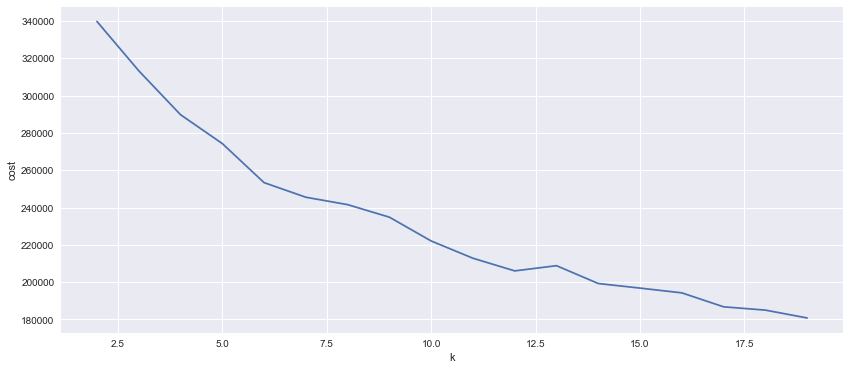

In [44]:
analysis_cost('scaled_features')

# APLICANDO CLUSTERING

In [45]:
from pyspark.ml.clustering import KMeans

for clusters in [6, 11, 13]:
    kmeans = KMeans()\
             .setK(clusters)\
             .setMaxIter(1000)\
             .setFeaturesCol("scaled_features")\
             .setPredictionCol("cluster_{}".format(clusters))

    model = kmeans.fit(scaled_data)
    scaled_data = model.transform(scaled_data)
    
data_perfil_cluster = scaled_data.toPandas()
data_perfil_cluster.head(10)

,codCliente,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4,features,scaled_features,cluster_6,cluster_11,cluster_13
0,24041,2,2,1,0,360,1,1,1,1,0,0,0,0,"[2.0, 2.0, 1.0, 0.0, 360.0, 1.0, 1.0, 1.0, 1.0...","[-1.02095811843, -0.313271853759, 0.9070800960...",5,2,6
1,9040,4,6,1,1,260,1,1,1,1,1,1,1,1,"[4.0, 6.0, 1.0, 1.0, 260.0, 1.0, 1.0, 1.0, 1.0...","[0.17657647594, 1.89727868435, 0.907080096047,...",0,9,0
2,18233,2,1,1,1,273,1,2,1,1,2,1,1,1,"[2.0, 1.0, 1.0, 1.0, 273.0, 1.0, 2.0, 1.0, 1.0...","[-1.02095811843, -0.865909488286, 0.9070800960...",5,8,6
3,7226,5,3,0,1,241,1,2,1,1,1,2,1,2,"[5.0, 3.0, 0.0, 1.0, 241.0, 1.0, 2.0, 1.0, 1.0...","[0.775343773127, 0.239365780768, -1.1024017294...",0,0,9
4,21617,3,2,1,1,268,1,1,1,0,0,0,0,0,"[3.0, 2.0, 1.0, 1.0, 268.0, 1.0, 1.0, 1.0, 0.0...","[-0.422190821246, -0.313271853759, 0.907080096...",5,7,7
5,9649,5,6,1,1,273,2,2,2,1,2,1,1,1,"[5.0, 6.0, 1.0, 1.0, 273.0, 2.0, 2.0, 2.0, 1.0...","[0.775343773127, 1.89727868435, 0.907080096047...",2,3,3
6,24762,1,1,1,1,241,1,1,1,1,0,0,0,0,"[1.0, 1.0, 1.0, 1.0, 241.0, 1.0, 1.0, 1.0, 1.0...","[-1.61972541562, -0.865909488286, 0.9070800960...",5,8,6
7,2486,5,1,0,1,241,1,1,1,1,1,1,1,1,"[5.0, 1.0, 0.0, 1.0, 241.0, 1.0, 1.0, 1.0, 1.0...","[0.775343773127, -0.865909488286, -1.102401729...",0,1,9
8,26272,2,1,0,1,268,1,1,1,1,1,1,1,1,"[2.0, 1.0, 0.0, 1.0, 268.0, 1.0, 1.0, 1.0, 1.0...","[-1.02095811843, -0.865909488286, -1.102401729...",5,1,1
9,13242,5,4,0,1,241,1,2,2,1,1,1,1,1,"[5.0, 4.0, 0.0, 1.0, 241.0, 1.0, 2.0, 2.0, 1.0...","[0.775343773127, 0.792003415295, -1.1024017294...",3,0,4


In [47]:
(data_perfil['saldoTcEntidad1'] == data_perfil_cluster['saldoTcEntidad1']).any()

True

In [51]:
 data_perfil_cluster.drop(['codCliente', 'scaled_features', 'features', 'cluster_11', 'cluster_13'], axis=1).head()

,rangoEdad,rangoIngreso,flagGenero,flagLimaProvCliente,ubigeoCliente,rangoCtdProdAct,rangoCtdProdPas,rangoCtdProdSeg,flagBxi,saldoTcEntidad1,saldoTcEntidad2,saldoTcEntidad3,saldoTcEntidad4,cluster_6
0,2,2,1,0,360,1,1,1,1,0,0,0,0,5
1,4,6,1,1,260,1,1,1,1,1,1,1,1,0
2,2,1,1,1,273,1,2,1,1,2,1,1,1,5
3,5,3,0,1,241,1,2,1,1,1,2,1,2,0
4,3,2,1,1,268,1,1,1,0,0,0,0,0,5


In [ ]:
sns.pairplot(data_perfil.iloc[:,1:], kind="scatter")

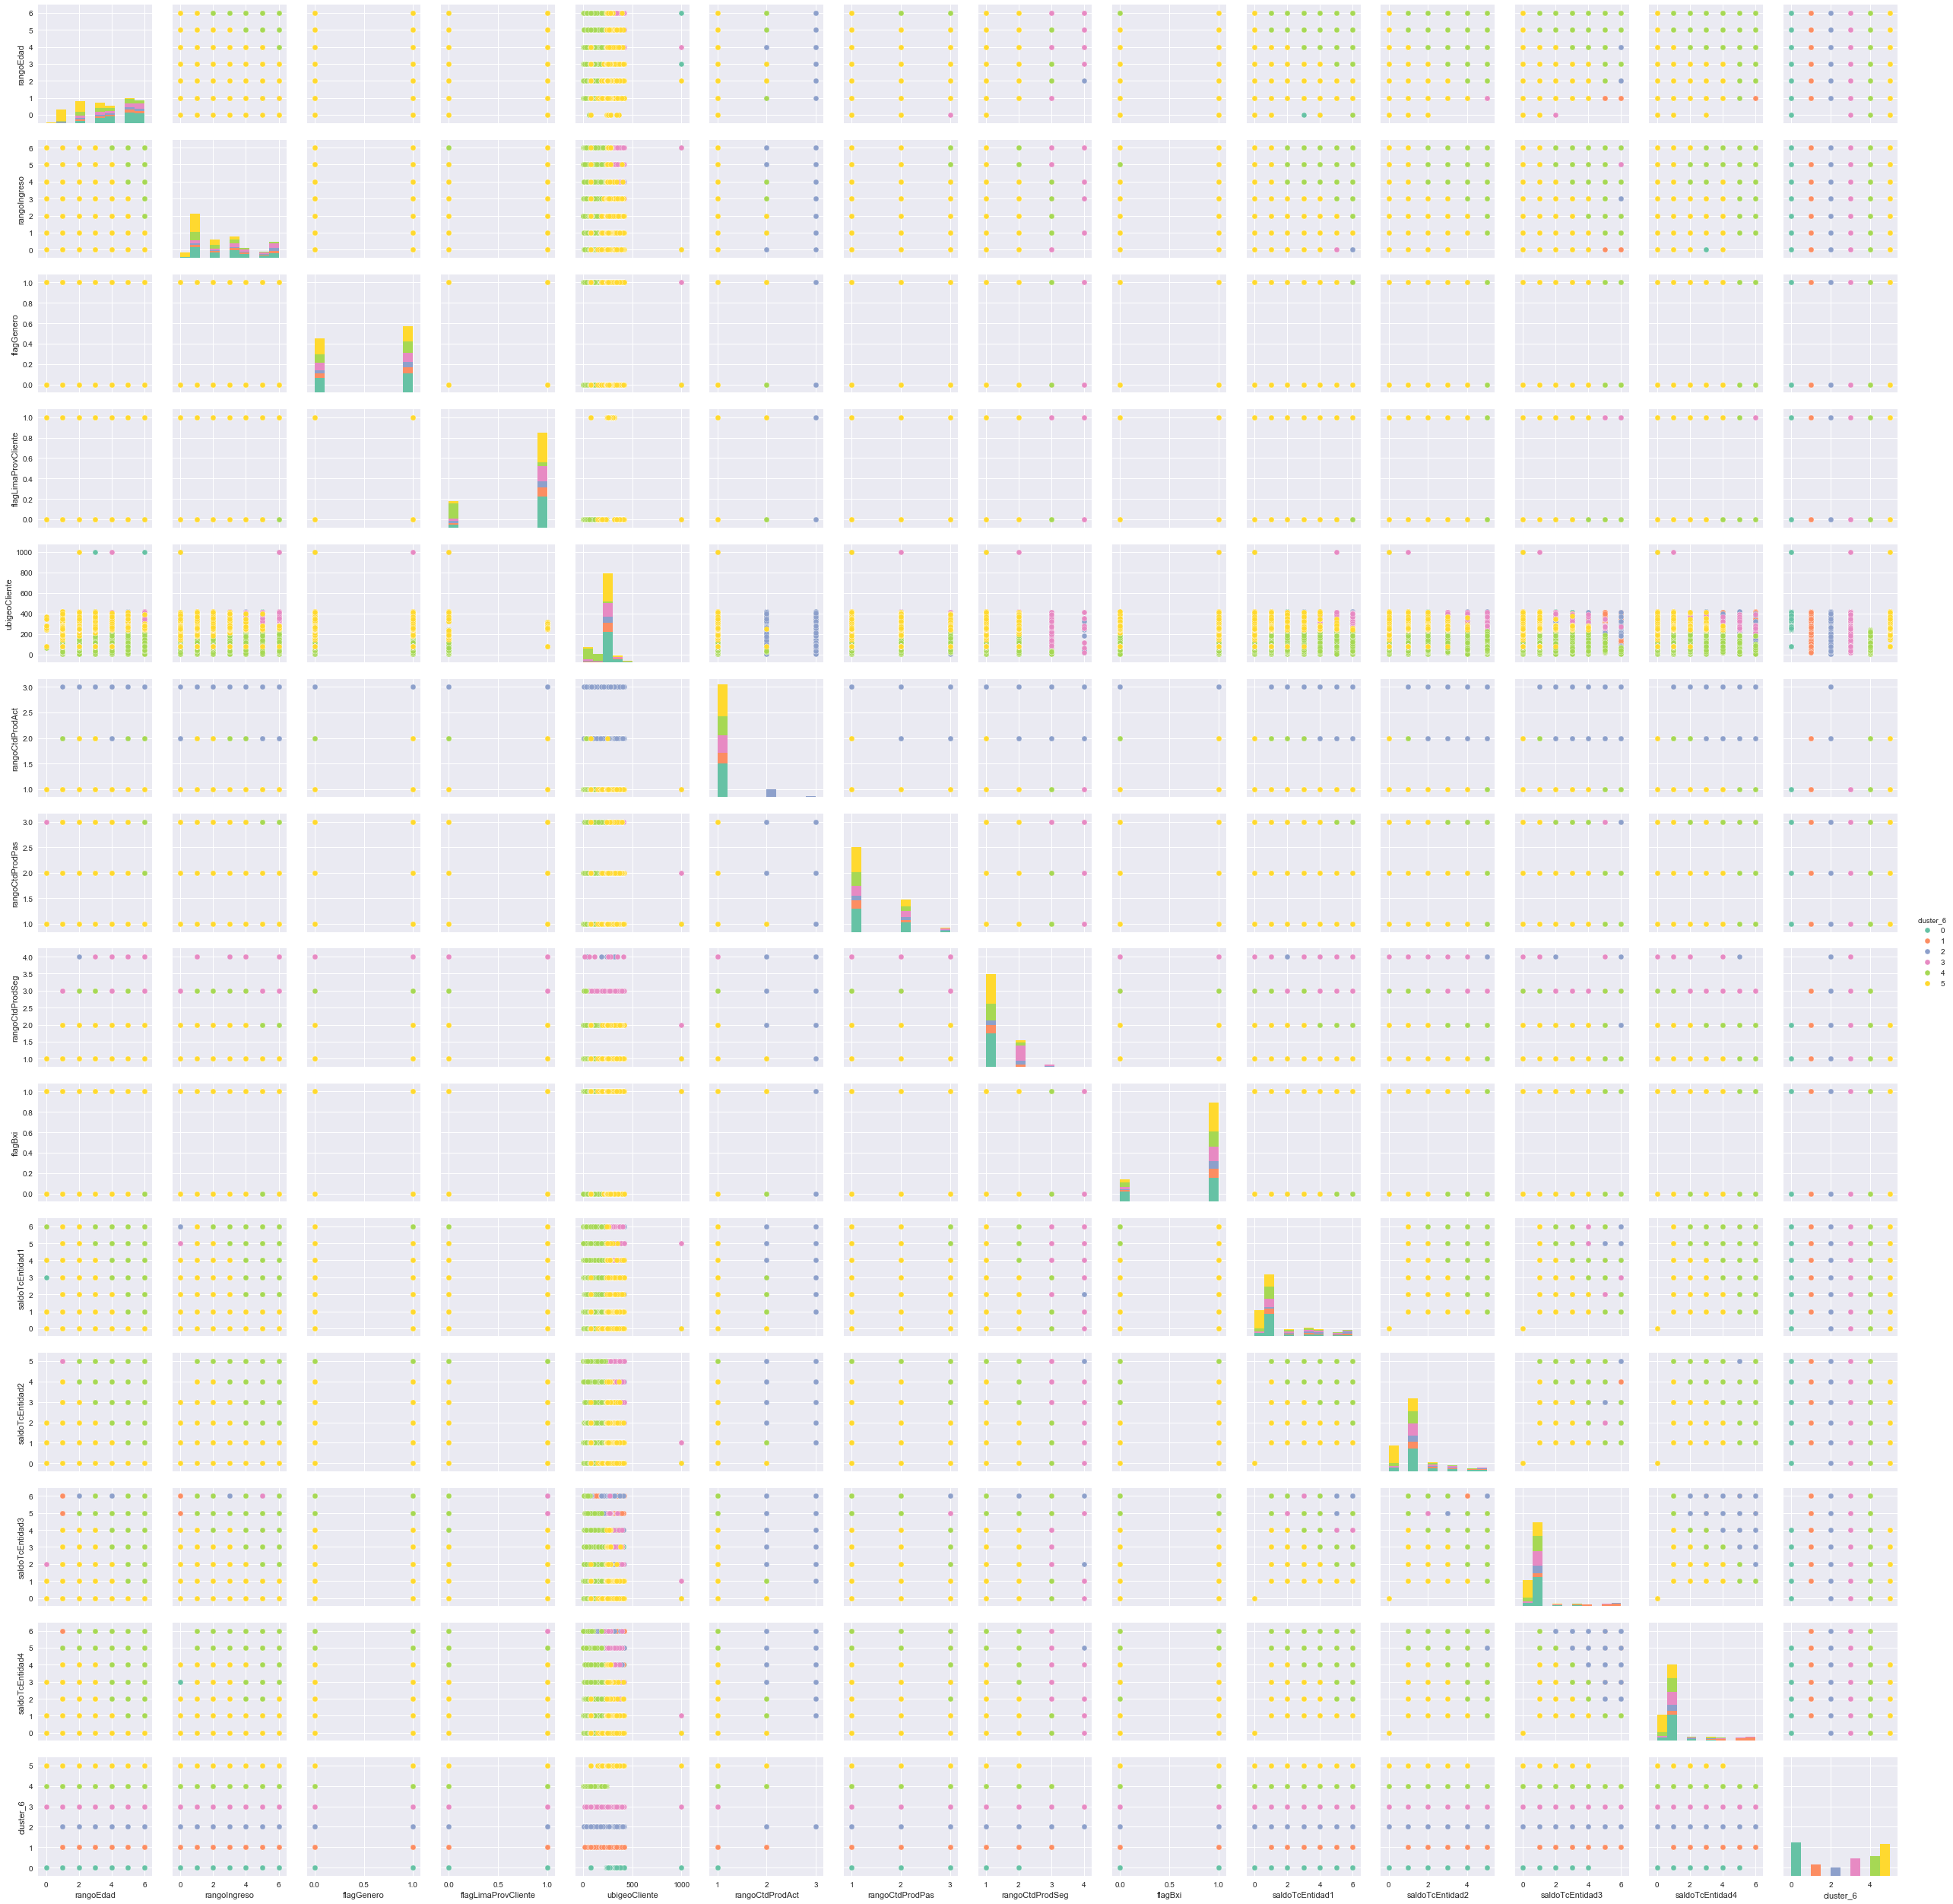

In [53]:
sns.pairplot(
    data_perfil_cluster.drop(['codCliente', 'scaled_features', 'features', 'cluster_11', 'cluster_13'], axis=1), 
    kind="scatter", 
    hue="cluster_6",
    palette="Set2"
)

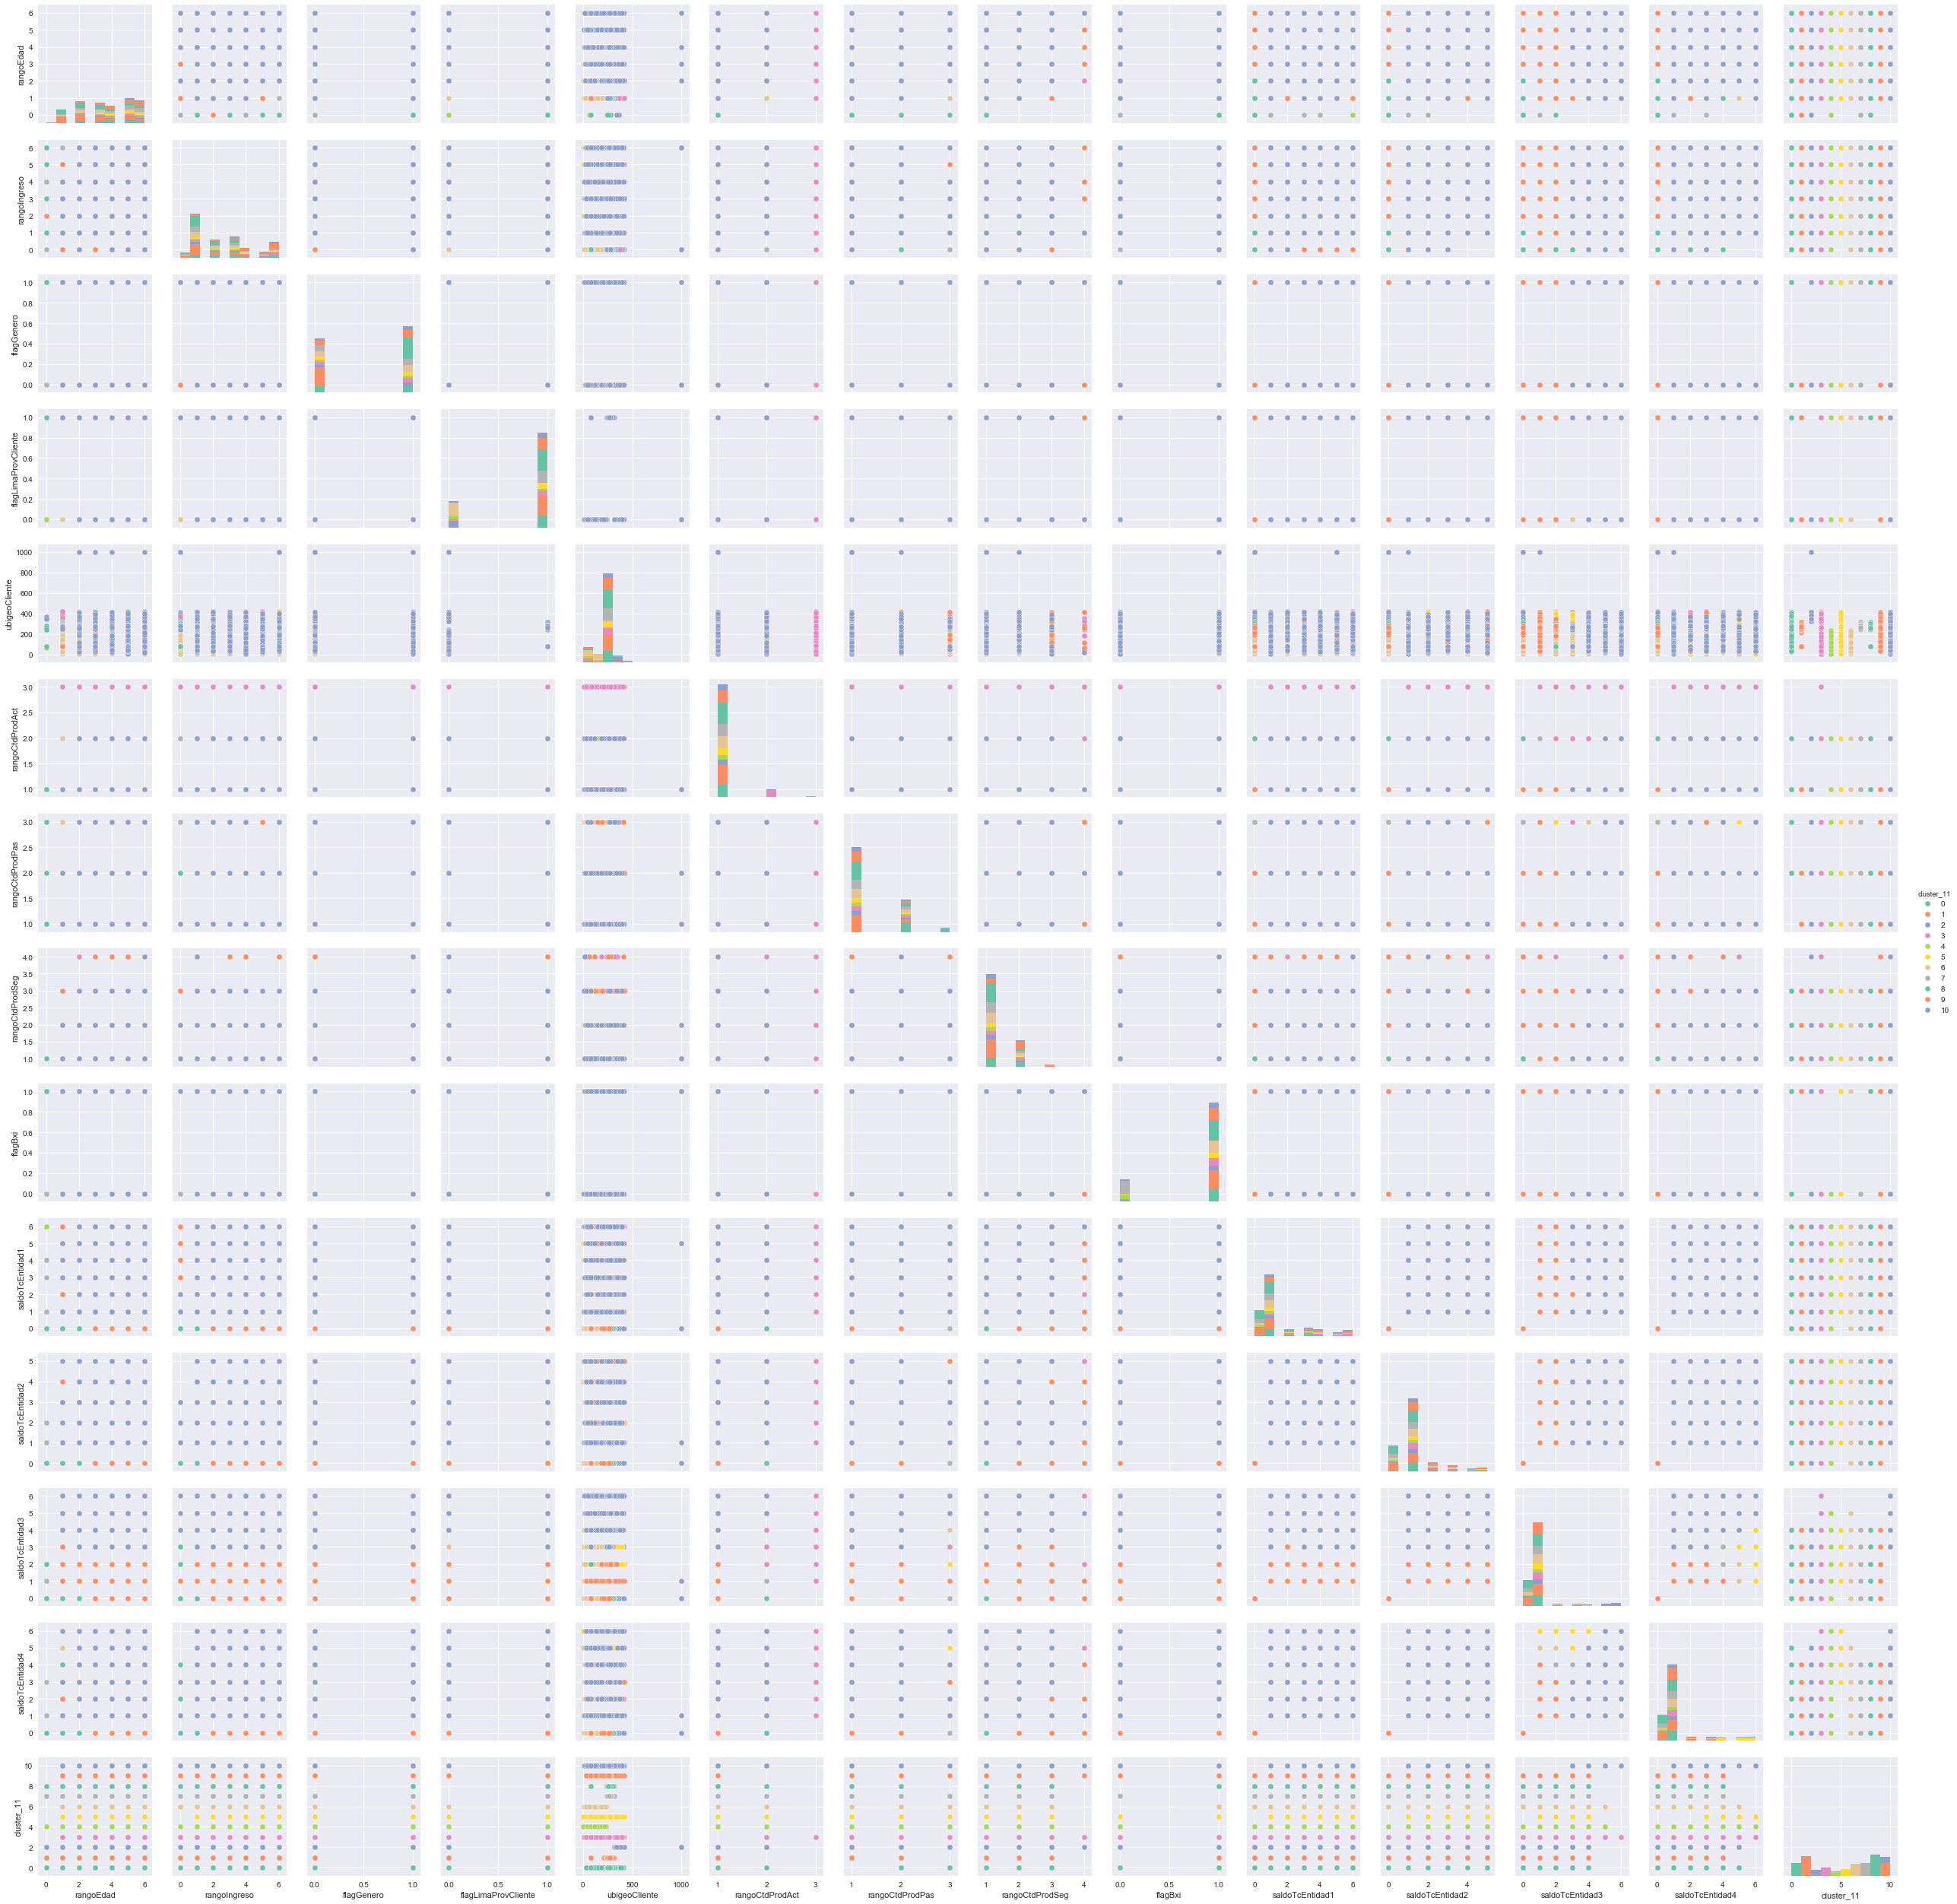

In [54]:
sns.pairplot(
    data_perfil_cluster.drop(['codCliente', 'scaled_features', 'features', 'cluster_6', 'cluster_13'], axis=1), 
    kind="scatter", 
    hue="cluster_11",
    palette="Set2"
)

In [ ]:
12